In [1]:
import pandas as pd
import numpy as np
import sklearn

## 신경망과 첫 만남

### 케라스에서 MNIST 데이터셋 적재하기

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

### 신경망 구조

In [8]:
from keras import models
from keras import layers

In [12]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # input
network.add(layers.Dense(10, activation='softmax')) # 10개의 확률점수가 들어있는 배열(모두 더하면 1)

- 손실함수(loss function) : 훈련 데이터에서 신경망의 성능을 측정하는 방법, 네트워크가 옳은 방향으로 학습하게끔 도와줌
- 옵티마이저(optimizer) : 입력된 데이터와 손실함수를 기반으로 네트워크를 업데이트하는 메커니즘

### 컴파일 단계

In [14]:
network.compile(optimizer='rmsprop', #
               loss='categorical_crossentropy',
               metrics=['accuracy'])

- rmsprop : 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영
- categorical_crossentropy : 다중분류 손실 함수의 일종, 학습 필요.

### 이미지 데이터 준비하기

In [15]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255 # 0~255 Unit8 -> 0~1 float32

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

### 레이블 준비하기

In [16]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2538 - acc: 0.9265
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1033 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0679 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0488 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0364 - acc: 0.9891


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [20]:
print("test_loss", test_loss)
print("test_acc", test_acc)

test_loss 0.07097093384466134
test_acc 0.9776


- 훈련정확도 : 98.91, 테스트 정확도 : 97.76
- 과대적합(overfitting)으로 인해 차이가 발생함, 새로운 데이터에서 서능이 낮아지는 경향

## 신경망을 위한 데이터 표현

#### tensor
- 머신러닝의 기본구성요소, 데이터를 위한 컨테이너
- 임의의 차원의 개수를 가지는 행렬, 차원을 종종 axis(축) 라고도 함

In [22]:
# 스칼라(0 Demesion 텐서)
# numpy에서는 float32 or float64가 속함
import numpy as np

In [25]:
x = np.array(12)
x.ndim

0

In [29]:
# 벡터(1D 텐서) : 숫자의 배열을 1D 텐서라고 함
# 아래 x는 원소가 5개니까 5차원 벡터 (5차원 텐서랑 혼동 금지)
x = np.array([1,2,3,4,5])
x.ndim

1

In [40]:
# 행렬(2D 텐서) : 행렬에는 행과 열의 2개 축이 있음
# 2차원 배열 선언시, 벡터 차원을 맞추지 않을시 축은 1개로 나타남(질문)
x = np.array([[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]]
            )
x.ndim

2

In [44]:
# 3D / 고차원 텐서 : 행렬을 새로운 배열로 합치면 직육면체형태로 해석가능한 3D텐서
x = np.array([
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
     [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]]
])
x.ndim

3

In [49]:
# 4D 텐서 : 3D 텐서를 배열로 합침
x = np.array(
[[
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
     [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]]
],
    [
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
            [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]],
     [[1,2,3,4,5],
            [6,7,8,9,10],
             [11,2,3,4,5]]
]]
)
x.ndim

4

In [50]:
x.shape

(2, 3, 3, 5)

### MNIST 차원 확인

In [54]:
from keras.datasets import mnist
(train_images, train_labels) ,(test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [56]:
digit = train_images[4]

In [57]:
import matplotlib.pyplot as plt

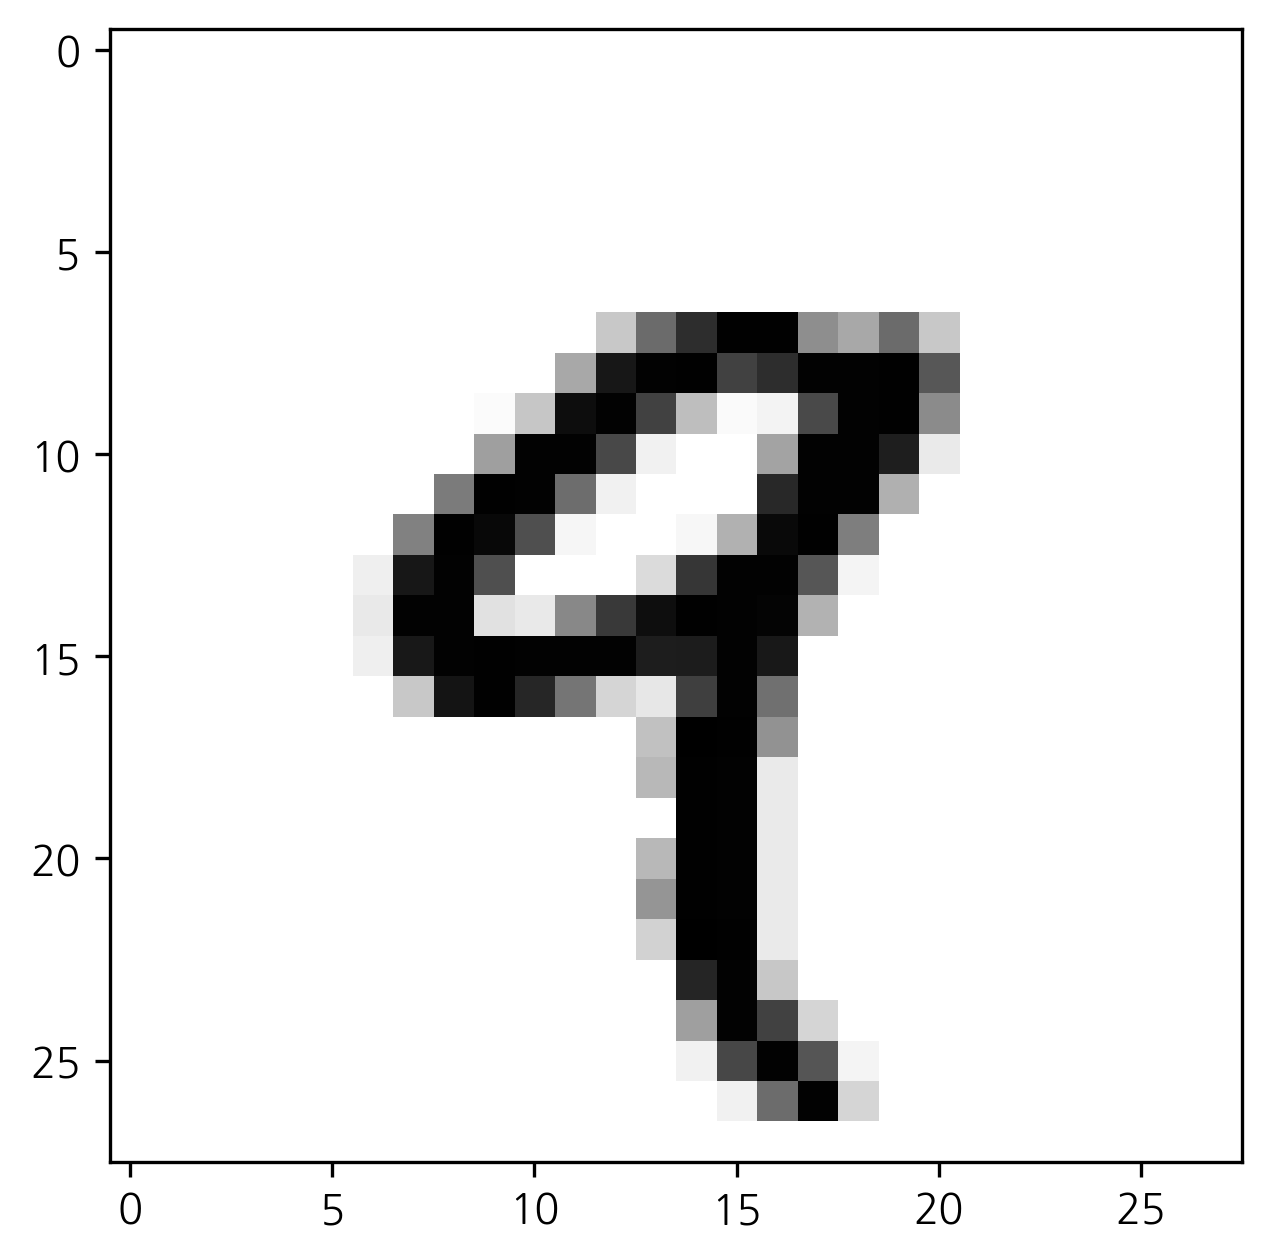

In [59]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 넘파이로 텐서 조작하기

In [60]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [62]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


### 배치 데이터
- 딥러닝의 모든 데이터 텐서의 첫 번째 축은 sample 축임
- 딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않음
- 데이터를 작은 배치(batch)로 나눔
- 배치데이터를 다룰 때 첫번째 축(0번째 축)을 batch axis or batch dimension 이라 함

In [65]:
batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [66]:
batch = train_images[128:256]
print(batch.shape)

(128, 28, 28)


### 텐서의 실제 사례
- 벡터 데이터 : (samples, features) 크기의 2D 텐서
- 시계열 or 시퀀스 데이터 : (samples, timesteps, features) 3D 텐서
- 이미지 : (samples, height, width, channels) or (samples, channels, height, width) 4D tensor
- 동영상 : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 5D tensor

## 신경망의 톱니바퀴 : 텐서연산
- 이항연산 처럼, 딥러닝이 학습한 모든 변환을 수치데이터 텐서에 적용하는 텐서연산 가능
- 예를들어, 텐서의 덧셈이나 곱셈 등

In [68]:
import keras
keras.layers.Dense(512, activation='relu')

### 원소별 연산

In [70]:
def naive_relu(x):
    assert len(x.shape) == 2 # 2D numpy array 인지 확인함 (가정설정문)
    
    x = x.copy() # 입력 텐서 자체를 바꾸지않도록 복사
    
    for i in range(x.shape[0]): # 2D 의 samples
        for j in range(x.shape[1]): # 2D 의 feature
            x[i, j] = max(x[i, j], 0)
    
    return x    

In [71]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shpae == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    
    return x

In [72]:
def naive_sub(x, y):
    assert len(x.shape) == 2
    assert x.shpae == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] -= y[i, j]
    
    return x

In [73]:
def naive_mul(x, y):
    assert len(x.shape) == 2
    assert x.shpae == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] *= y[i, j]
    
    return x

### 브로드캐스팅
- shape이 다른 텐서의 연산

In [74]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

In [75]:
z = np.maximum(x, y)

In [78]:
z.shape # x와 동일한 shape으로 출력

(64, 3, 32, 10)

### 텐서 점곱(tensor product)
- 원소 갯수가 같은 텐서끼리 가능
- x의 두번째 차원과 첫번째 차원이 같아야함

In [79]:
z = np.dot(x,y)

ValueError: shapes (64,3,32,10) and (32,10) not aligned: 10 (dim 3) != 32 (dim 0)

## 신경망의 엔진 : 그래디언트 기반 최적화
- 훈련 샘플 x와 이에 상응하는 타깃 y의 배치 추출
- x를 사용하여 네트워크를 실행하고(정방향 패스 단계), 예측 y_pred를 구현
- y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산
- 배치에 대한 손실이 감소하는 방향으로 모든 가중치 업데이터
- 그래디언트의 반대방향으로 가중치를 이동하면 손실이 감소

## Summary
- 학습(Learning)은 훈련 데이터 샘플과 그에 상응하는 target이 주어졌을 때 손실함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 의미함
- 데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행됨. 네트워크의 파라미터는 그래디언트의 반대방향으로 조금씩 움직임
- 전체 학습 과정인 신경망이 미분가능한 텐서연산이기에 가능함. 미분의 연쇄법칙 사용
- 손실, 옵티마이저는 네트워크에 데이터를 주입하기 전에 정의되어야 함
- 손실은 훈련하는 동안 최소화해야함
- 옵티마이저는 RMSProp, SGD 등 손실에 대한 그래디언트가 파라미터를 업데이트하는 정확한 방식을 정의